# Social Media Analysis (Classification)

Pada use case ini akan dilakukan klasifikasi dari dataset clean_tweet yang dapat diunduh pada link [dataset](https://drive.google.com/open?id=1q0MyZQphW-XN1WeJTkXPw1AQAKfdT5oI). Dari dataset tersebut akan dilakukan analisis klasifikasi untuk menentukan bagaimana proporsi sentimen positif dan negatifnya. Sehingga didapat insight dari dataset tersebut tentunya yang berkenaan dengan *twitter user behavior*.

### Load Librarys
Berikut adalah librarys yang digunakan untuk mengerjakan use case *social media analysis* dengan metode klasifikasi.

In [73]:
# import libraries
import pandas as pd
import numpy as np

# import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tararo064184\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Dataset

In [2]:
# Load dataset clean_tweet.csv
data = pd.read_csv('clean_tweet.csv')

In [3]:
# Melihat 5 baris pertama dari dataset clean_tweet.csv
data.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [4]:
# Melihat 5 baris pertama dari dataset clean_tweet.csv
data.tail()

,text,target
1599995,just woke up having no school is the best feel...,1
1599996,thewdb com very cool to hear old walt intervie...,1
1599997,are you ready for your mojo makeover ask me fo...,1
1599998,happy th birthday to my boo of alll time tupac...,1
1599999,happy charitytuesday,1


> Dari dataset tersebut terlihat bahwa terdapat 2 features yang ada pada dataset tersebut, yaitu text dan target. Dimana text merepresentasikan kalimat tweet dari setiap pengguna twitter. Sementara target adalah sentiment yang dihasilkan dari setiap tweet pengguna apakah itu negatif (target = 0) ataukah positif (target = 1).

### Dimensi dataset

In [5]:
# Dimensi dari dataset clean_tweet.csv
data.shape

(1600000, 2)

> Pada dataset clean_tweet.csv terdapat data 1.600.000 data tweet dalam bentuk text/string/object serta klasifikasi sentiment dari masing-masing tweet.

### Deteksi Missing Values

In [6]:
# Tipe data pada clean_tweet.csv
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596753 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [7]:
# Deteksi missing value
missing = data.isnull().sum().sort_values(ascending = False)
missing

text      3247
target       0
dtype: int64

In [8]:
# Deteksi missing value (dalam %)
pct_missing = round(data.isnull().sum()/len(data)*100,2).sort_values(ascending = False)
pct_missing

text      0.2
target    0.0
dtype: float64

> Dari dataset tersebut terdapat 0.2% missing values yang senilai dengan 3.247 row data. Sehingga untuk melakukan analisis ke tahap selanjutnya perlu dihapuskan untuk tidak digunakan pada analisis.

### Remove Missing Values

In [36]:
# Remove missing value
df = data.dropna()

In [37]:
# Menampilkan 5 baris pertama dari dataset
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [38]:
# Menampilkan 5 baris terakhir dari dataset
df.tail()

,text,target
1599995,just woke up having no school is the best feel...,1
1599996,thewdb com very cool to hear old walt intervie...,1
1599997,are you ready for your mojo makeover ask me fo...,1
1599998,happy th birthday to my boo of alll time tupac...,1
1599999,happy charitytuesday,1


In [39]:
# Deteksi missing value
missing = df.isnull().sum().sort_values(ascending = False)
missing

target    0
text      0
dtype: int64

In [40]:
df.shape

(1596753, 2)

> Dikarenakan adanya missing values maka perlu dilakukan remove missing values. Kemudian setelah dilakukan penghapusan missing values dilakukan pengecekan kembali apakah missing values sudah benar-benar dihapuskan atau belum. Dari code di atas dapat dilihat bahwa 0.2% missing values sudah berhasil dihapuskan. Sehingga saat ini akan digunakan sejumlah 1.596.753 row data.

## A. Basic Text Pre-processing

### 1. Lower casing
Mengubah seluruh karakter pada features yang ditentukan menjadi lower casing (huruf kecil) seluruhnya agar mudah dideteksi oleh sistem pada saat melakukan analisis.

In [44]:
# Mengubah karakter pada features text yang berupa kalimat tweet
# Menjadi huruf kecil (lower casing) seluruhnya
df['text'] = df['text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

# Menampilkan 5 baris pertama pada features tweet
# Setelah seluruh karakter diubah menjadi huruf kecil (lower casing)
df['text'].head()

C:\Users\tararo064184\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    awww that s a bummer you shoulda got david car...
1    is upset that he can t update his facebook by ...
2    i dived many times for the ball managed to sav...
3       my whole body feels itchy and like its on fire
4    no it s not behaving at all i m mad why am i h...
Name: text, dtype: object

### 2. Punctuation Removal
Menghapuskan tanda baca yang terdapat pada masing-masing row tweet sebab saat melakukan analisis tanda baca tersebut tidak akan digunakan.

In [16]:
# Menghapuskan tanda baca yang ada pada kalimat tweet
df['text'] = df['text'].str.replace('[^\w\s]','')

# Menampilkan 5 baris pertama pada features tweet
# Setelah seluruh tanda baca dihapuskan 
df_new.head()

C:\Users\tararo064184\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,text,target
128244,is pissed my husband is not working today he s...,0
492674,i m down to only you win,0
471809,i just ate my dinner and i feel rather hungry now,0
492181,green with envy here,0
838057,i want to see it tell me more about the plot o...,1


### 3. Stopwords Removal
Menghapuskan kata imbuhan seperti "the", "a", "an", "in", dll karena kata imbuhan tersebut tidak akan memiliki makna sentimen apapun baik positif maupun negatif. Untuk melihat lebih detail stopwords apa saja yang terdapat pada bahasa inggris (english) sebagai berikut:

In [17]:
# Menghimpun seluruh stopwords yang ada pada bahasa inggris (english)
stop = stopwords.words('english')

# Menghapuskan stopwords yang ada pada masing-masing row tweet
# Sebab untuk melakukan analisis kata-kata tersebut tidak akan digunakan
df['text'] = df['text'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

# Menampilkan 5 baris teratas dari dataframe
df['text'].head()

C:\Users\tararo064184\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                                     behaving mad see
Name: text, dtype: object

### 4. Spelling Correction
Memperbaiki ejaan pada masing-masing kata pada row tweet agar kata-kata yang digunakan seragam dan mudah dikelompokkan pada masing-masing sentimen baik positif maupun negatif.

In [18]:
# Membenarkan ejaan pada setiap kata yang terletak pada seluruh row tweet
# Dengan contoh 5 row data teratas (index 0 - 4)
df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0           www summer should got david care third day
1    upset update facebook testing might cry result...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                                     behaving mad see
Name: text, dtype: object

### 5. Tokenization
Proses split kalimat menjadi kata, frase, ataupun bentuk lainnya yang memiliki makna. Hasil tokenisasi disebut sebagai **token**. Tentunya split kalimat menjadi beberapa bagian baik dalam bentuk kata ataupun fase akan memberikan makna agar memiliki nilai untuk menentukan sentimen pada setiap tweet yang ada.

In [19]:
# Proses tokenisasi untuk setiap row pada dataset
# Contoh dengan menggunakan row data ke 128244 hasil dari random sampling
TextBlob(df['text'][1]).words

WordList(['upset', 'update', 'facebook', 'texting', 'might', 'cry', 'result', 'school', 'today', 'also', 'blah'])

### 6. Stemming
Mengubah seluruh kata berimbuhan kedalam kata dasarnya. Contohnya untuk kata program, programs, programer, programing, programers menjadi kata program.

In [20]:
# Menghimpun seluruh kata dasar pada bahasa inggris (english)
stemm = PorterStemmer()

In [21]:
# Proses extract kata-kata berimbuhan menjadi kata dasar
# Mengambil sampel 5 row data teratas (index 0 - 4)
df['text'] = df['text'][:5].apply(lambda x: " ".join([stemm.stem(word) for word in x.split()]))

# Menampilkan 5 baris pertama pada dataset
df['text'].head()

C:\Users\tararo064184\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0         awww bummer shoulda got david carr third day
1    upset updat facebook text might cri result sch...
2         dive mani time ball manag save rest go bound
3                      whole bodi feel itchi like fire
4                                        behav mad see
Name: text, dtype: object

## B. Data Preparation

### 1. Rename Target Value
Nilai pada feature target akan direplace dengan string agar visualisasi yang dihasilkan lebih mudah untuk dibaca. Dimana target yang tertera memiliki makna:
- Target 0 : Negative Sentiment
- Target 1 : Positive Sentiment

In [50]:
# Rename target value
# Target = 0 : Negative
# Target = 1 : Positive
df['target'] = df['target'].replace({0 :'Negative', 1 : 'Positive'})

C:\Users\tararo064184\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [51]:
# Menampilkan 5 row teratas dari dataset
# Setelah value pada target di rename menjadi negative dan positive sentimen
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,Negative
1,is upset that he can t update his facebook by ...,Negative
2,i dived many times for the ball managed to sav...,Negative
3,my whole body feels itchy and like its on fire,Negative
4,no it s not behaving at all i m mad why am i h...,Negative


> Dari dataframe di atas terlihat bahwa nilai dari target sudah berubah menjadi Negative (target = 0) dan Positive (target = 1). Hal ini tentunya akan mempermudah dalam membiat visualisasi data sehingga dapat dengan mudah dibaca.

### 1. Random Sampling
Random sampling ini dilakukan untuk memudahkan running program. Sebab ketika menggunakan seluruh data proses running script sangat lama.

In [52]:
# Random sampling dari dataset sebanyak 100000 data
df_new = df.sample(n = 100000, replace=True, random_state=1)

# Menampilkan 5 row teratas dari dataset
df_new.head()

,text,target
128244,is pissed my husband is not working today he s...,Negative
492674,i m down to only you win,Negative
471809,i just ate my dinner and i feel rather hungry now,Negative
492181,green with envy here,Negative
838057,i want to see it tell me more about the plot o...,Positive


> Dari dataset awal dibuat random sampling yang kemudian sampel tersebut digunakan untuk melakukan classification analisis. Alasan dilakukannya sampling adalah untuk mengambil sebagian data saja supaya kinerja sistem untuk memodelkan data tersebut lebih cepat dan tidak memberatkan. Sebab data awal sejumlah 1.600.000 data sehingga akan sangat lama dalam membuat model. Kemudian dilakukan secara random dengan alasan agar sampel yang diambil dapat merepresentasikan dari data awal dan tidak condong ke suatu sudut pandang ataupun sentimen.

### 2. Data Exploration
Dengan data exploration akan dilihat proporsi dari masing-masing target pada sampel data

In [78]:
#count sentiment 
sentiment = df_new.groupby(['target'])['target'].count()
sentiment

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['target']
chart.drop(['target'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,target,tweet_count,percent
0,Negative,49810,0.4981
1,Positive,50190,0.5019


> Dari dataframe di atas dapat diketahui bahwa proporsi dari sentimen negatif dan positif hampir sama. Dapat dikatakan bahwa proporsi keduanya 50:50. Dengan ini tentunya sampel yang diambil dapat dikatakan mampu merepresentasikan dari data awal.

### 3. Target Pie Chart
Pie chart akan digunakan untuk melihat proporsi dari target/sentimen pada dataset.

(-1.1264513948497268,
 1.2444875195720748,
 -1.1264741383071688,
 1.268865249517141)

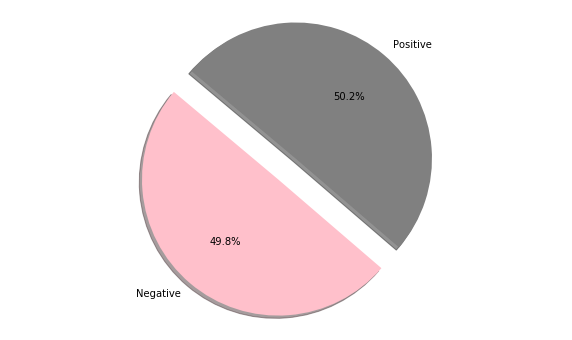

In [55]:
# Warna yang akan digunakan pada target pie chart
colors = ['pink','grey']

# Hasil pie chart akan dipisahkan antar pie nya
explode = (0, 0.2)

# Plotting pie chart
figure = plt.figure(figsize= (10,6))
plt.pie(chart['tweet_count'],
        explode = explode,
        labels = chart['target'],
        colors = colors,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 140)
plt.axis('equal')

> Pie chart ini adalah gambaran lebih nyata (visualisasi) dari proporsi sentimen negatif dan juga sentimen positif.

### 4. Wordcloud

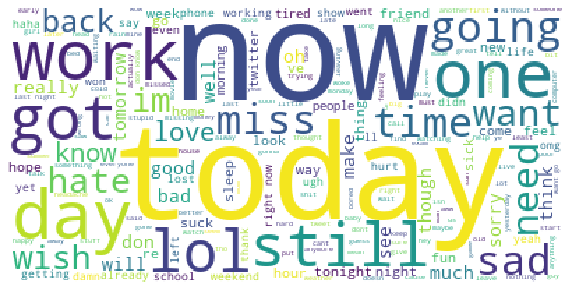

In [88]:
# wordcloud dari negative sentiment
negative = df_new[df_new['target']=='Negative']
words = ' '.join(negative['text'])
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'white'
                     ).generate(words)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

> **Wordcloud Sentimen Negatif** <br>
Dari wordcloud sentimen negatif di atas dapat dikatakan bahwa sentimen negatif tersebut rata-rata didominasi oleh keluh kesah pengguna twitter. Dimana dapat dilihat bahwa kata-kata yang dominan muncul pada sentimen negatif adalah
- now
- day
- today
- work
- still, dst

> Kata-kata tersebut tentunya dapat diprediksi bahwa sentimen negatif ini berisi keluh kesah pengguna twitter di hari itu juga (waktu mereka mwmbuat tweet) dan tentunya berisi aktivitas ataupun peristiwa kurang mengenakkan yang mereka alami di hari itu. Mayoritas keluh kesah yang mereka utarakan di twitter adalah seputar pekerjaan mereka. Setelah itu diikuti dengan keluh kesah seputar waktu (dalam hal ini bisa jadi waktu tunggu dst), serta seputar asmara pengguna twitter.

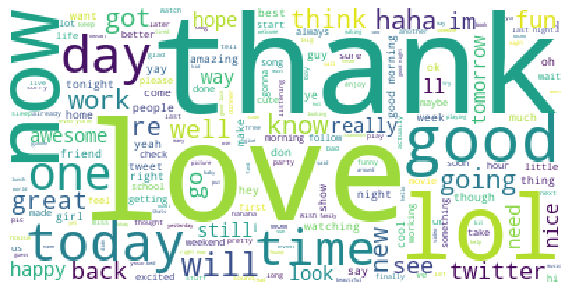

In [58]:
# wordcloud dari positive sentiment
positive = df_new[df_new['target']=='Positive']
words = ' '.join(positive['text'])
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'pink').generate(words)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

> **Wordcloud Sentimen Positif** <br>
Dari wordcloud sentimen positif di atas dapat dikatakan bahwa sentimen positif tersebut rata-rata didominasi oleh rasa syukur pengguna twitter seputar asmara mereka. Dimana dapat dilihat bahwa kata-kata yang dominan muncul pada sentimen positif adalah
- thank
- love
- good
- good
- now, dst

> Dari kata-kata yang dominan muncul pada sentimen positif tersebut tentunya dapat diprediksi bahwa mayoritas sentimen positif yang diberikan oleh pengguna twitter adalah rasa syukur mereka terhadap hal-hal yang terjadi di hari itu. Seperti hal-hal yang mampu membuat mereka bahagia di hari itu serta hal-hal yang menurut mereka lucu dan bisa membuat mereka tertawa. Hal tersebut dapat terlihat pada wordcloud sentimen positif dari sampel data yang digunakan.

## C. Feature Extraction
- **Count Vectorizer** : Menghitung frekuensi dari unique word pada masing-masing row data dalam bentuk array. Dengan alur: dari dataset tersebut di-extract unique word dan disimpan dalam suatu array, kemudian membuat frekuensi dari masing-masing kata pada row data dalam bentuk array berdasarkan unique word.
- **TF-IDF Transformer** : Serupa dengan Count Vectorizer namun dikalikan dengan nilai IDF Component.
- **TF-IDF Vectorizer** : Kombinasi dari Count Vectorizer dan TF-IDF Transformer. Atau dengan mudahnya adalah proporsi dari frekuensi unique word yang muncul pada masing-masing row data.

<br>
Pada sentimen analisis ini akan digunakan nilai TF-IDF Vectorizer karena nilainya akan lebih representatif daripada Count Vectorizer. Sebab TF-IDF Vectorizer adalah proporsi frekuensi dari masing-masing unique word pada setiap row data. Sementara Count Vectorizer hanya frekuensi dari unique word pada masing-masing row data.

In [60]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

## D. Modelling
Selanjutnya akan dibuat model yang mampu merepresentasikan dataset pengguna twitter.

### 1. Train Test Split

In [62]:
# Definisikan X dan y untuk melakukan analisis

# X didapat dari value pada feature text yang berupa tweet pengguna twitter
X = df_new['text']

# y didapat dari value pada feature target yang berupa nilai/sentimen dari masing-masing row tweet pengguna twitter
y = df_new['target']

In [63]:
# countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

# tfidf vectorizer
X_tfidf = tfidf.fit_transform(X)

In [64]:
# train test split using countvectorizer
# dengan proporsi train 70% dan test 30%
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.3, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.3, random_state=0)

> Untuk membuat model klasifikasi perlu dilakukan split dari sampel data dengan proporsi data train 70% dan data test 30%. Pengambilan data train dan data test dilakukan secara random.

### 2. Model Machine Learning
Berikut akan dibuat model untuk sentiment analysis dengan menggunakan metode klasifikasi. Dipilih dua metode yang akan diuji untuk membandingkan keduanya manakah model yang lebih baik untuk menggambarkan sentiment analysis dari data twitter. Metode terpilih sebagai berikut:
- Logistic regression
- Naive Bayes

### 2.a. Logistic Regression

In [79]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

C:\Users\tararo064184\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
# using TFIDFVectorizer
print('=========================================')
print('      TF-IDF - Logistic Regression       ')
print('=========================================')

Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

print('')
print('Result Summary :')
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))
print('')
print('=========================================')

      TF-IDF - Logistic Regression       

Result Summary :
Recall train & test     : 82.81% & 76.50%
Precision train & test  : 82.81% & 76.50%
F1 Score train & test   : 82.81% & 76.01%



> **TF-IDF : Logistic Regression** <br>
Dari result summary di atas diketahui bahwa kebaikan model untuk merepresentasikan sentiment analysis dari dataset twitter ada pada nilai 82.81% untuk data train dan 76% untuk data test. Dari summary tersebut dapat disimpulkan bahwa model Logistic Regression mampu merepresentasikan sentimen dataset sebab nilai kebaikannya > 50%. Kemudian dari perbandingan train dan test (sekitar 6%) dapat dikatakan bahwa sampel yang diambil sudah baik. Sehingga model yang dibuat dapat memiliki kebaikan yang tidak jauh berbeda dengan data lain yang diujikan.

### 2.b. Naive Bayes

In [84]:
# TFIDFVectorizer
# dengan menggunakan fungsi multinomial
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)

In [91]:
# using TFIDFVectorizer
print('=========================================')
print('          TF-IDF - Naive Bayes          ')
print('=========================================')

NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(test_y,NB_pred_tfidf_test,average="micro")

print('')
print('Result Summary :')
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))
print('')
print('=========================================')

          TF-IDF - Naive Bayes          

Result Summary :
Recall train & test     : 84.25% & 75.26%
Precision train & test  : 84.25% & 75.26%
F1 Score train & test   : 84.25% & 75.70%



> **TF-IDF Naives Bayes** <br>
Dari result summary di atas diketahui bahwa kebaikan model untuk merepresentasikan sentiment analysis dari dataset twitter ada pada nilai 84.25% untuk data train dan 75% untuk data test. Dari summary tersebut dapat disimpulkan bahwa model Naives Bayes mampu merepresentasikan sentimen dataset sebab nilai kebaikannya > 50%. Kemudian dari perbandingan train dan test (sekitar 9%) dapat dikatakan bahwa sampel yang diambil sudah baik. Sehingga model yang dibuat dapat memiliki kebaikan yang tidak jauh berbeda dengan data lain yang diujikan.

### Conclusion

- Pada umumnya *social media* twitter digunakan oleh penggunanya untuk memberikan informasi seputar peristiwa atau kegiatan yang mereka lakukan di hari itu juga. Dari data tersebut hanya terdapat dua macam sentimen yaitu positif dan negatif. Jadi dapat dikatakan bahwa mayoritas tweet yang dibuat memiliki sentimen tertentu (bukan netral). Sentimen tersebut dapat terbentuk saat pengguna sedang senang/bahagia (positif) ataupun sedang marah/kesal/sedih (negatif). Rata-rata tweet yang dibuat adalah seputar pekerjaan pengguna ataupun kisah cinta (asmara).

- Dengan dataset yang digunakan maka model yang baik yang mampu merepresentasikan sentimen dari pengguna twitter adalah Naives Bayes. Sehingga metode tersebut dapat digunakan pada data-data tweet berikutnya untuk mengetahui sentimen apa yang dimunculkan dari tweet yang dibuat. Kebaikan dari model tersebut ada pada angka 84% yang artinya model tersebut dapat merepresentasikan dataset namun tidak *over-fitting*.

- Dengan dilakukannya *sentiment analysis / social media analysis* ini dapat membantu perusahaan dalam mengenal *customer behaviour* nya. Dengan mengenal maka perusahaan dapat memberikan *campaign* yang tepat sasaran. Sehingga *effort* yang dilakukan memiliki peluang lebih untuk sukses. Dengan analisis ini juga dapat memberikan informasi tambahan untuk dilakukan *customer segmentation*. Tentunya hal-hal seperti ini dapat membantu perusahaan untuk menaikkan penjualan barang/jasanya.